#Mounting the Google drive

In [1]:
!python --version

Python 3.10.12


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Read CSV



In [4]:
import pandas as pd
import numpy as np
df=pd.read_csv(("/content/drive/My Drive/MITACS/Data.csv"))
df.head()

,PUMFID,VERDATE,MH_05,MH_10,MH_15A,MH_15B,MH_15C,MH_15D,MH_15E,MH_15F,...,PCSIZMIZ,PIIDFLAG,PIMMST,PLM_30,PLM_40,PPROV,PRURURB,PVISMIN,PAGEGR,PUMFFACT
0,5106,10/06/2020,3,3,3,4,2,2,2,2,...,2,2,1,5,4,35,2,1,6,0.4165
1,5107,10/06/2020,3,3,3,1,2,2,1,2,...,3,2,1,4,4,13,2,2,7,0.7167
2,5108,10/06/2020,1,3,1,1,1,1,1,1,...,3,2,1,5,4,12,2,2,4,0.5585
3,5109,10/06/2020,2,4,3,3,2,3,2,3,...,2,2,1,5,3,48,2,2,4,1.9391
4,5110,10/06/2020,3,4,3,2,2,2,3,3,...,3,2,2,4,5,59,2,1,7,0.5311


##Dropping the unnecessary columns

In [5]:
df1=df
df=df.drop(columns=['PUMFFACT','PUMFID','VERDATE','MH_05','MH_15A', 'MH_15B','MH_15C','MH_15D','MH_15E','MH_15F','MH_15G','ANXDVGAD','PAGEGR'])

In [22]:
data=df
cols=df.columns.tolist()

for i in cols:
  df[i]=df[i].replace(9,np.NaN)
df['PLM_30']=df['PLM_30'].replace(99,np.NaN)
df['ANXDVGAC']=df['ANXDVGAC'].replace(9,np.NaN)

count=df.groupby('PLM_40').size()
print(df.isnull().sum())

MH_10        34
MH_20        62
BH_60A       64
BH_60B      223
BH_60C      175
BH_55A       37
BH_55B      300
BH_55C       93
BH_55D       42
BH_55E       53
BH_55F       63
BH_55G       66
BH_55H       90
BH_55I      119
BH_55J       74
BH_55K      106
DEM_10        0
MHDVMHI      19
ANXDVGAC    623
ANXDVSEV    623
AGEGR_10      0
PBH_55L     115
PCSIZMIZ    606
PIIDFLAG     98
PIMMST       78
PLM_30      112
PLM_40       74
PPROV         0
PRURURB     606
PVISMIN     523
dtype: int64


#Approach 1:


##Imputing the NaN values

In [23]:
#Imputing using KNN imputer
from sklearn.impute import KNNImputer
knn_imputer=KNNImputer()
df_imputed=knn_imputer.fit_transform(df)
df_imputed=pd.DataFrame(np.round(df_imputed), columns=df.columns.tolist())
df_imputed.head()

,MH_10,MH_20,BH_60A,BH_60B,BH_60C,BH_55A,BH_55B,BH_55C,BH_55D,BH_55E,...,AGEGR_10,PBH_55L,PCSIZMIZ,PIIDFLAG,PIMMST,PLM_30,PLM_40,PPROV,PRURURB,PVISMIN
0,3.0,5.0,4.0,3.0,4.0,2.0,3.0,4.0,4.0,4.0,...,4.0,1.0,2.0,2.0,1.0,5.0,4.0,35.0,2.0,1.0
1,3.0,2.0,3.0,4.0,4.0,2.0,2.0,3.0,3.0,4.0,...,4.0,1.0,3.0,2.0,1.0,4.0,4.0,13.0,2.0,2.0
2,3.0,2.0,3.0,4.0,3.0,1.0,1.0,2.0,3.0,3.0,...,3.0,1.0,3.0,2.0,1.0,5.0,4.0,12.0,2.0,2.0
3,4.0,3.0,3.0,3.0,3.0,2.0,4.0,3.0,2.0,1.0,...,3.0,1.0,2.0,2.0,1.0,5.0,3.0,48.0,2.0,2.0
4,4.0,3.0,3.0,4.0,4.0,1.0,2.0,3.0,2.0,2.0,...,4.0,1.0,3.0,2.0,2.0,4.0,5.0,59.0,2.0,1.0


#CHECKING DATA IMBALANCE

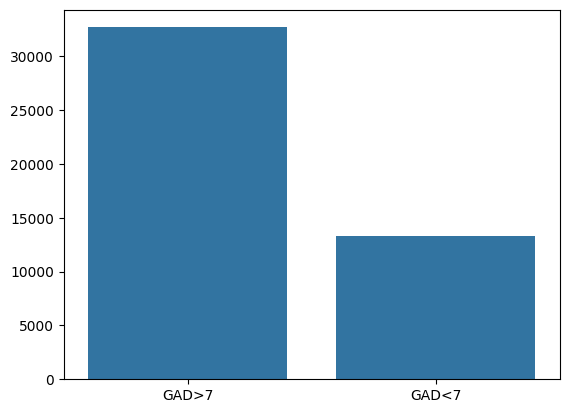

In [28]:

import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the number of cases for each GAD category
gad_counts = df_imputed['ANXDVGAC'].value_counts()

# Create a bar plot of the GAD category counts
sns.barplot(x=['GAD>7', 'GAD<7'], y=gad_counts.values)

# Set the x-axis tick labels
plt.xticks(ticks=[0, 1], labels=['GAD>7', 'GAD<7'])

# Show the plot
plt.show()


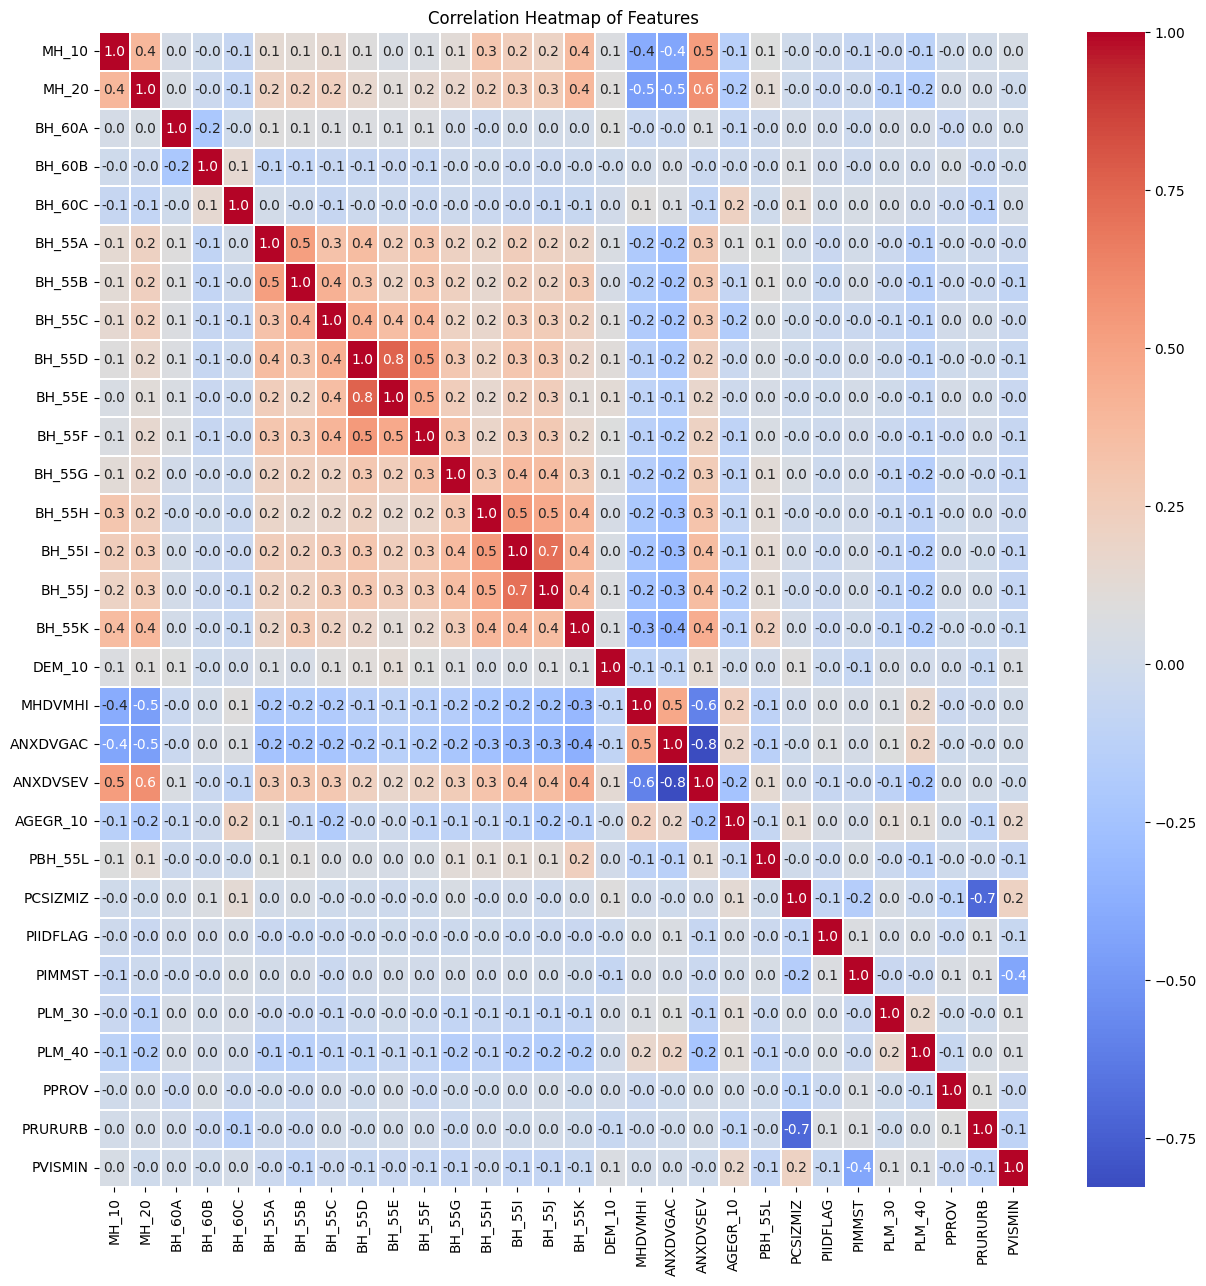

In [29]:

import matplotlib.pyplot as plt
import seaborn as sns

# Get the numerical columns
numerical_cols = df_imputed.select_dtypes(include=['int64', 'float64']).columns

# Compute the correlation matrix
correlation_matrix = df_imputed[numerical_cols].corr()

# Create a heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, linewidths=.3, cmap="coolwarm", fmt=".1f")
plt.title("Correlation Heatmap of Features")
plt.show()


##Test Train Validation Split

In [30]:
from sklearn.model_selection import train_test_split
c_i=[str(i) for i in cols if i!='ANXDVSEV' and i!='ANXDVGAC']

Xi_train, Xi_test, Yi_train, Yi_test = train_test_split(df_imputed[c_i], df_imputed['ANXDVGAC'], test_size=0.2,random_state = 42)
Xi_train, Xi_val, Yi_train, Yi_val =train_test_split(Xi_train, Yi_train, test_size=0.2, random_state=42)

In [31]:
#Label Encoding the Y values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
Yi_train=le.fit_transform(Yi_train)
Yi_val=le.fit_transform(Yi_val)
Yi_test=le.fit_transform(Yi_test)

## One Hot Encoding

In [32]:
#merge one-hot encoded columns back with original DataFrame
Xi_train = pd.concat([Xi_train.drop('PPROV', axis = 1), pd.get_dummies(Xi_train['PPROV'])], axis=1)
Xi_test = pd.concat([Xi_test.drop('PPROV', axis = 1), pd.get_dummies(Xi_test['PPROV'])], axis=1)
Xi_val = pd.concat([Xi_val.drop('PPROV', axis = 1), pd.get_dummies(Xi_val['PPROV'])], axis=1)

Xi_train.columns=Xi_train.columns.astype(str)
Xi_test.columns=Xi_test.columns.astype(str)
Xi_val.columns=Xi_val.columns.astype(str)

# BUILDING MODELS FOR PREDICTING  GAD SCORE ( ANXDVGAC )

##Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score

classify=LogisticRegression(solver='lbfgs', max_iter=1000, random_state=0)
classify.fit(Xi_train,Yi_train)
y_val_pred=classify.predict(Xi_val)

y_val_pred_proba = classify.predict_proba(Xi_val)[:,1]

print("ROC AUC:", roc_auc_score(Yi_val, y_val_pred_proba))
print("Accuracy:", accuracy_score(Yi_val, y_val_pred))
print("Precision:", precision_score(Yi_val, y_val_pred))
print("F1 Score:", f1_score(Yi_val, y_val_pred))

ROC AUC: 0.8971509953030681
Accuracy: 0.8331295012909362
Precision: 0.8596522674314393
F1 Score: 0.8865064695009242


In [40]:
#Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
param_space_lg={
    'C': np.logspace(-10,3,10),
    'penalty': ['l1','l2'],
    'solver': ['liblinear', 'newton-cg', 'lbfgs']
}

random_search_lg = RandomizedSearchCV(classify, param_distributions=param_space_lg, n_iter=10, cv=5)
random_search_lg.fit(Xi_train, Yi_train)

print("Best Hyperparameters: ", random_search_lg.best_params_)
print("Best Accuracy: ", random_search_lg.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best Hyperparameters:  {'solver': 'liblinear', 'penalty': 'l1', 'C': 0.046415888336127725}
Best Accuracy:  0.8298452605044802


In [35]:
#Getting the  ROC score, Accuracy, Precision and F1 score for the best parameters obtained after hyperparameter tuning
import time
classify_=LogisticRegression(solver= 'liblinear', penalty= 'l1', C= 1.2915496650148828)

t1= time.time()
classify_.fit(Xi_train, Yi_train)
t2=time.time()
y_test_pred=classify_.predict(Xi_test)

y_test_pred_proba = classify_.predict_proba(Xi_test)[:,1]
t3=time.time()
print("ROC AUC:", roc_auc_score(Yi_test, y_test_pred_proba))
print("Accuracy:", accuracy_score(Yi_test, y_test_pred))
print("Precision:",precision_score(Yi_test, y_test_pred))
print("F1 Score:", f1_score(Yi_test, y_test_pred))
print('Time:', t2-t1, 'and', t3-t2)

ROC AUC: 0.898906995046179
Accuracy: 0.8382257012393999
Precision: 0.8654818667822569
F1 Score: 0.8895158895158894
Time: 11.1737539768219 and 0.01041412353515625


MHDVMHI     0.809175
PIIDFLAG    0.422735
63.0        0.305071
24.0        0.165689
PLM_40      0.158100
AGEGR_10    0.142262
47.0        0.089600
35.0        0.067199
BH_60B      0.064329
PLM_30      0.027242
11.0        0.021054
BH_55F      0.019495
BH_55E      0.006320
BH_60C      0.002915
BH_60A      0.014212
PCSIZMIZ    0.019747
BH_55H      0.029639
59.0        0.029820
48.0        0.039490
PIMMST      0.050314
BH_55D      0.076253
13.0        0.076741
BH_55B      0.080019
BH_55I      0.083680
PBH_55L     0.105626
46.0        0.115938
PRURURB     0.131249
10.0        0.156269
12.0        0.158941
BH_55J      0.172613
PVISMIN     0.181673
BH_55G      0.182914
BH_55C      0.184614
BH_55K      0.215964
DEM_10      0.239123
BH_55A      0.279749
MH_20       0.821914
MH_10       0.861733
dtype: float64


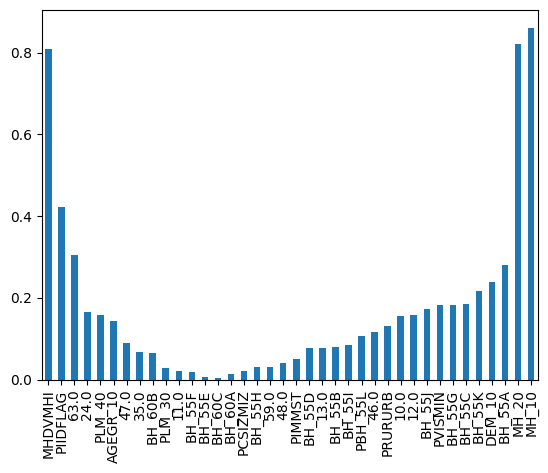

In [36]:
#getting feature importance for logistic regression algorithm
importance_GAC=pd.Series(classify.coef_[0], index=Xi_train.columns).sort_values(ascending=False)
abs(importance_GAC).plot.bar()
print(abs(importance_GAC))

##Random Forest

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split

rf = RandomForestClassifier()
rf.fit(Xi_train, Yi_train)
y_val_pred = rf.predict(Xi_val)
y_val_pred_proba_rf = rf.predict_proba(Xi_val)[:, 1]
roc_auc_rf = roc_auc_score(Yi_val, y_val_pred_proba_rf)
accuracy_rf = accuracy_score(Yi_val, y_val_pred)
precision_rf = precision_score(Yi_val, y_val_pred)
f1_rf = f1_score(Yi_val, y_val_pred)

print("ROC AUC:", roc_auc_rf)
print("Accuracy:", accuracy_rf)
print("Precision:", precision_rf)
print("F1 Score:", f1_rf)

ROC AUC: 0.8972263076465992
Accuracy: 0.8363908139692893
Precision: 0.865604057236008
F1 Score: 0.8881248838505854


In [ ]:
#Hyperparameter tuning
param_space_rf = {
    'n_estimators': np.arange(100, 1000, 200),
    'max_depth': [None] + list(np.arange(5, 30, 5)),
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}


random_search_rf = RandomizedSearchCV(rf, param_distributions=param_space_rf, n_iter=10, cv=5)
random_search_rf.fit(Xi_train, Yi_train)

# Print the best hyperparameters and accuracy
print("Best Hyperparameters: ", random_search_rf.best_params_)
print("Best Accuracy: ", random_search_rf.best_score_)

Best Hyperparameters:  {'n_estimators': 700, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 15}
Best Accuracy:  0.8348058788229402


In [38]:
#Getting the  ROC score, Accuracy, Precision and F1 score for the best parameters obtained after hyperparameter tuning

rf_ = RandomForestClassifier(n_estimators= 900, min_samples_split= 5, min_samples_leaf =1, max_features= 'sqrt', max_depth= 20)

t1=time.time()
rf_.fit(Xi_train, Yi_train)
t2=time.time()
y_val_pred_rf_best = rf.predict(Xi_test)
y_val_pred_proba_rf_best = rf.predict_proba(Xi_test)[:, 1]
t3=time.time()

print("ROC AUC:", roc_auc_score(Yi_test, y_val_pred_proba_rf_best))
print("Accuracy:", accuracy_score(Yi_test, y_val_pred_rf_best))
print("Precision:", precision_score(Yi_test, y_val_pred_rf_best, average='micro'))
print("F1 Score:", f1_score(Yi_test, y_val_pred_rf_best, average='micro'))
print('Time:', t2-t1, 'and', t3-t2)

ROC AUC: 0.8999759277676312
Accuracy: 0.8409436834094368
Precision: 0.8409436834094368
F1 Score: 0.8409436834094368
Time: 32.24259376525879 and 0.5048525333404541


##Naive Bayes

In [39]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, f1_score

nb = MultinomialNB()
nb.fit(Xi_train, Yi_train)
y_val_pred = nb.predict(Xi_val)
y_val_pred_proba = nb.predict_proba(Xi_val)[:, 1]


roc_auc_nb = roc_auc_score(Yi_val, y_val_pred_proba)
accuracy_nb = accuracy_score(Yi_val, y_val_pred)
precision_nb = precision_score(Yi_val, y_val_pred)
f1_nb = f1_score(Yi_val, y_val_pred)


print("ROC AUC:", roc_auc_nb)
print("Accuracy:", accuracy_nb)
print("Precision:", precision_nb)
print("F1 Score:", f1_nb)

ROC AUC: 0.8678901679375174
Accuracy: 0.8097567604294061
Precision: 0.8281223304288399
F1 Score: 0.873805660717505


In [ ]:
random_search_nb = RandomizedSearchCV(nb, param_distributions={'alpha': np.logspace(-3,3,20)}, n_iter=10, cv=5)
random_search_nb.fit(Xi_train, Yi_train)

print("Best Hyperparameters: ", random_search_nb.best_params_)
print("Best Accuracy: ", random_search_nb.best_score_)

Best Hyperparameters:  {'alpha': 2.976351441631316}
Best Accuracy:  0.8067411732838432


In [ ]:
import time
nb = MultinomialNB(alpha= 2.9763)
t1_=time.time()
nb.fit(Xi_train, Yi_train)
t2_=time.time()
y_val_pred_nb_best = nb.predict(Xi_test)
y_val_pred_proba_nb_best = nb.predict_proba(Xi_test)[:, 1]
t3_=time.time()

print("ROC AUC:", roc_auc_score(Yi_test, y_val_pred_proba_nb_best))
print("Accuracy:", accuracy_score(Yi_test, y_val_pred_nb_best))
print("Precision:", precision_score(Yi_test, y_val_pred_nb_best))
print("F1 Score:", f1_score(Yi_test, y_val_pred_nb_best))
print('Time:', t2_-t1_, 'and', t3_-t2_)

ROC AUC: 0.8727916766079379
Accuracy: 0.814416177429876
Precision: 0.8335170893054025
F1 Score: 0.8763312323407956
Time: 0.020859241485595703 and 0.012086629867553711


##KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

# Fit the model on the training data
knn.fit(Xi_train, Yi_train)
y_val_pred = knn.predict(Xi_val)
y_val_pred_proba_knn = knn.predict_proba(Xi_val)[:, 1]

roc_auc_knn = roc_auc_score(Yi_val, y_val_pred_proba_knn)
accuracy_knn = accuracy_score(Yi_val, y_val_pred)
precision_knn = precision_score(Yi_val, y_val_pred)
f1_knn = f1_score(Yi_val, y_val_pred)

print("ROC AUC:", roc_auc_knn)
print("Accuracy:", accuracy_knn)
print("Precision:", precision_knn)
print("F1 Score:", f1_knn)

ROC AUC: 0.8327026825427969
Accuracy: 0.8013317026769942
Precision: 0.8247121498539268
F1 Score: 0.8678119349005425


In [ ]:
param_space_knn = {
    'n_neighbors': np.arange(1, 20),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]
}

random_search_knn = RandomizedSearchCV(knn, param_distributions=param_space_knn, n_iter=10, cv=5)
random_search_knn.fit(Xi_train, Yi_train)


print("Best Hyperparameters: ", random_search_knn.best_params_)
print("Best Accuracy: ", random_search_knn.best_score_)

Best Hyperparameters:  {'weights': 'distance', 'p': 2, 'n_neighbors': 17}
Best Accuracy:  0.8099008850626083


In [ ]:
knn = KNeighborsClassifier(weights='uniform', p= 2, n_neighbors= 15)
import time
t_1=time.time()
knn.fit(Xi_train, Yi_train)
t_2=time.time()
y_val_pred_knn_best = knn.predict(Xi_test)
y_val_pred_proba_knn_best = knn.predict_proba(Xi_test)[:, 1]
t_3=time.time()

time=t_2-t_1
print("ROC AUC:", roc_auc_score(Yi_test, y_val_pred_proba_knn_best))
print("Accuracy:", accuracy_score(Yi_test, y_val_pred_knn_best))
print("Precision:", precision_score(Yi_test, y_val_pred_knn_best))
print("F1 Score:", f1_score(Yi_test, y_val_pred_knn_best))
print('Time:', time, 'and', t_3-t_2)

ROC AUC: 0.872872829645974
Accuracy: 0.8152859317242879
Precision: 0.8260694108151735
F1 Score: 0.8784779343394608
Time: 0.010227680206298828 and 3.616494655609131


##XGBoost

In [ ]:
import xgboost as xgb

dtrain = xgb.DMatrix(Xi_train, label=Yi_train)
dval = xgb.DMatrix(Xi_val, label=Yi_val)

params = {
    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'seed': 42
}


xg = xgb.train(params, dtrain)
y_val_pred_proba_xg = xg.predict(dval)
y_val_pred_xg = np.round(y_val_pred_proba)


roc_auc_xg = roc_auc_score(Yi_val, y_val_pred_proba_xg)
accuracy_xg = accuracy_score(Yi_val, y_val_pred_xg)
precision_xg = precision_score(Yi_val, y_val_pred_xg, average='micro')
f1_xg = f1_score(Yi_val, y_val_pred_xg, average='micro')

print("ROC AUC:", roc_auc_xg)
print("Accuracy:", accuracy_xg)
print("Precision:", precision_xg)
print("F1 Score:", f1_xg)

ROC AUC: 0.899346989731396
Accuracy: 0.8097567604294061
Precision: 0.8097567604294061
F1 Score: 0.8097567604294061


In [41]:

from xgboost import XGBClassifier

param_space = {
    'n_estimators': (100, 1000, 200),
    'learning_rate': (0.001, 1.0, 'log-uniform'),
    'max_depth': (3, 10),
    'subsample': (0.5, 1.0),
    'colsample_bytree': (0.5, 1.0),
    'gamma': (0, 5),
    'min_child_weight': (1, 10)
}

xgb = XGBClassifier()

random_search_xg = RandomizedSearchCV(xgb, param_space, n_iter=10, cv=5)
random_search_xg.fit(Xi_train, Yi_train)

print("Best Hyperparameters: ", random_search_xg.best_params_)
print("Best Accuracy: ", random_search_xg.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py", line 1519, in fit
    self._Booster = train(
  File "/usr/local/lib/python3.10/dist-packages/xgboost/core.py", line 730, in inner_f
  

Best Hyperparameters:  {'subsample': 1.0, 'n_estimators': 1000, 'min_child_weight': 1, 'max_depth': 3, 'learning_rate': 1.0, 'gamma': 5, 'colsample_bytree': 0.5}
Best Accuracy:  0.8319180100523849


In [ ]:
import time

dtest = xgb.DMatrix(Xi_test, label=Yi_test)
params_xg_best = {
    'colsample_bytree': 0.8598412495178092,
    'gamma': 0,
    'learning_rate': 0.06271143111588302,
    'max_depth': 5,
    'min_child_weight': 4,
    'n_estimators': 100,
    'subsample':0.5336880628622024
}
t1_=time.time()
xg = xgb.train(params_xg_best, dtrain)
t2_=time.time()
y_test_pred_proba_xg_best = xg.predict(dtest)
y_test_pred_xg_best = np.round(y_test_pred_proba_xg_best)
t3_=time.time()

time=t2_-t1_
print("ROC AUC:", roc_auc_score(Yi_test, y_test_pred_proba_xg_best))
print("Accuracy:", accuracy_score(Yi_test, y_test_pred_xg_best))
print("Precision:", precision_score(Yi_test, y_test_pred_xg_best, average='micro'))
print("F1 Score:", f1_score(Yi_test, y_test_pred_xg_best, average='micro'))
print("Time:", time, 'and', t3_-t2_)

[02:11:02] WARNING: ../src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

ROC AUC: 0.8951787086693511
Accuracy: 0.8382257012393999
Precision: 0.8382257012393999
F1 Score: 0.8382257012393999
Time: 0.4792971611022949 and 0.003322124481201172


##AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()

# Train the AdaBoost model
model.fit(Xi_train, Yi_train)

# Make predictions on the validation set
y_val_pred_proba_ad = model.predict_proba(Xi_val)[:, 1]
y_val_pred_ad = model.predict(Xi_val)

# Calculate ROC AUC score
roc_auc_ad = roc_auc_score(Yi_val, y_val_pred_proba_ad)

# Calculate accuracy
accuracy_ad = accuracy_score(Yi_val, y_val_pred_ad)
precision_ad = precision_score(Yi_val, y_val_pred_ad)

# Calculate F1 score
f1_ad = f1_score(Yi_val, y_val_pred_ad)

# Print the evaluation metrics
print("ROC AUC:", roc_auc_ad)
print("Accuracy:", accuracy_ad)
print("Precision:", precision_ad)
print("F1 Score:", f1_ad)

ROC AUC: 0.8999855230937734
Accuracy: 0.832314173121348
Precision: 0.8578317556706555
F1 Score: 0.8861623616236163


In [ ]:
from sklearn.ensemble import AdaBoostClassifier

param_space_ada = {
    'n_estimators': np.arange(50, 500, 50),
    'learning_rate': np.logspace(-3, 0, 4),
    'algorithm': ['SAMME', 'SAMME.R']
}

ada = AdaBoostClassifier()

# Perform random search with cross-validation
random_search_ada = RandomizedSearchCV(ada, param_distributions=param_space_ada, n_iter=10, cv=5)
random_search_ada.fit(Xi_train, Yi_train)

# Print the best hyperparameters
print("Best Hyperparameters: ", random_search_ada.best_params_)
print("Best Accuracy: ", random_search_ada.best_score_)

Best Hyperparameters:  {'n_estimators': 250, 'learning_rate': 1.0, 'algorithm': 'SAMME.R'}
Best Accuracy:  0.8328014045933954


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
import time
model = AdaBoostClassifier(n_estimators= 150, learning_rate=1.0, algorithm ='SAMME.R')

t1=time.time()
model.fit(Xi_train, Yi_train)
t2=time.time()

y_val_pred_proba_ad_best = model.predict_proba(Xi_test)[:, 1]
y_val_pred_ad_best = model.predict(Xi_test)
t3=time.time()

print("ROC AUC:",roc_auc_score(Yi_test, y_val_pred_proba_ad_best))
print("Accuracy:", accuracy_score(Yi_test, y_val_pred_ad_best))
print("Precision:", precision_score(Yi_test, y_val_pred_ad_best))
print("F1 Score:", precision_score(Yi_test, y_val_pred_ad_best))
print("Time", t2-t1, 'and', t3-t2)

ROC AUC: 0.9027669354463737
Accuracy: 0.837573385518591
Precision: 0.862534079494906
F1 Score: 0.862534079494906
Time 3.7966787815093994 and 0.4799768924713135


##MLP

In [43]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(100, 100, 1), max_iter=1000, random_state=0)

mlp.fit(Xi_train, Yi_train)


y_val_pred_proba_mlp = mlp.predict_proba(Xi_val)[:, 1]
y_val_pred_mlp = mlp.predict(Xi_val)

# Calculate ROC AUC score
roc_auc_mlp = roc_auc_score(Yi_val, y_val_pred_proba_mlp)

# Calculate accuracy
accuracy_mlp = accuracy_score(Yi_val, y_val_pred_mlp)

# Calculate precision
precision_mlp = precision_score(Yi_val, y_val_pred_mlp, average='micro')

# Calculate F1 score
f1_mlp = f1_score(Yi_val, y_val_pred_mlp, average='micro')

print("ROC AUC:", roc_auc_mlp)
print("Accuracy:", accuracy_mlp)
print("Precision:", precision_mlp)
print("F1 Score:", f1_mlp)

ROC AUC: 0.8441957875896429
Accuracy: 0.7843456991439054
Precision: 0.7843456991439054
F1 Score: 0.7843456991439055


In [44]:
param_space_mlp = {
    'hidden_layer_sizes': [(100,100,1), (100,50,1), (50, 50,1), (100, 100,50,1)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate': ['constant', 'adaptive'],
    'alpha': np.logspace(-5, -2, 4)
}

random_search_mlp = RandomizedSearchCV(mlp, param_distributions=param_space_mlp, n_iter=10, cv=5)
random_search_mlp.fit(Xi_train, Yi_train)
print("Best Hyperparameters: ", random_search_mlp.best_params_)
print("Best Accuracy: ", random_search_mlp.best_score_)

Best Hyperparameters:  {'solver': 'adam', 'learning_rate': 'adaptive', 'hidden_layer_sizes': (100, 50, 1), 'alpha': 0.01, 'activation': 'logistic'}
Best Accuracy:  0.834296258317465


In [ ]:
from sklearn.neural_network import MLPClassifier
import time

mlp = MLPClassifier( max_iter=1000, solver='sgd', learning_rate='constant', hidden_layer_sizes= (50, 50, 1), alpha=0.0001, activation='relu')

t1=time.time()
mlp.fit(Xi_train, Yi_train)
t2=time.time()

y_test_pred_proba_mlp_best = mlp.predict_proba(Xi_test)[:, 1]
y_test_pred_mlp_best = mlp.predict(Xi_test)
t3=time.time()

print("ROC AUC:", roc_auc_score(Yi_test, y_test_pred_proba_mlp_best))
print("Accuracy:", accuracy_score(Yi_test, y_test_pred_mlp_best))
print("Precision:", precision_score(Yi_test, y_test_pred_mlp_best, average='micro'))
print("F1 Score:", f1_score(Yi_test, y_test_pred_mlp_best, average='micro'))
print("Time:", t2-t1, 'and', t3-t2)

ROC AUC: 0.9006278312457001
Accuracy: 0.8326810176125244
Precision: 0.8326810176125244
F1 Score: 0.8326810176125244
Time: 107.72669696807861 and 0.035364389419555664


##LightBoost

In [57]:
from tensorflow.python.ops.gen_math_ops import lgamma
import lightgbm as lgb

train_data = lgb.Dataset(Xi_train, label=Yi_train)
val_data = lgb.Dataset(Xi_val, label=Yi_val)
test_data= lgb.Dataset(Xi_test, label=Yi_test)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'seed': 42
}

# Use early_stopping_rounds in a custom training loop
num_boost_round = 100
early_stopping_rounds = 10
best_iteration = None
for i in range(num_boost_round):
    lg = lgb.train(params, train_data, valid_sets=[val_data], num_boost_round=1)
    # Implement your early stopping logic here based on validation performance
    # ...
    # If early stopping condition is met:
    # best_iteration = i
    # break

# Use the best iteration for prediction
y_val_pred_proba_lg = lg.predict(Xi_val, num_iteration=best_iteration)
y_val_pred_lg = [round(pred) for pred in y_val_pred_proba_lg]


roc_auc_lg = roc_auc_score(Yi_val, y_val_pred_proba_lg)
accuracy_lg = accuracy_score(Yi_val, y_val_pred_lg)


precision_lg = precision_score(Yi_val, y_val_pred_lg, average='micro')


f1_lg = f1_score(Yi_val, y_val_pred_lg, average='micro')

print("ROC AUC:", roc_auc_lg)
print("Accuracy:", accuracy_lg)
print("Precision:", precision_lg)
print("F1 Score:", f1_lg)


print(lg.params)

[LightGBM] [Info] Number of positive: 20899, number of negative: 8533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 29432, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710077 -> initscore=0.895760
[LightGBM] [Info] Start training from score 0.895760
[LightGBM] [Info] Number of positive: 20899, number of negative: 8533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005116 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 29432, number of used features: 38
[LightGBM] [Info] [binar

In [58]:
from lightgbm import LGBMClassifier

param_space_lg = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': np.arange(3, 10),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.logspace(-3, 3, 7),
    'reg_lambda': np.logspace(-3, 3, 7),
    'min_child_samples': np.arange(1, 20)
}

lgb = LGBMClassifier()

random_search_lgb = RandomizedSearchCV(lgb, param_space_lg,n_iter=10, cv=5)
random_search_lgb.fit(Xi_train, Yi_train)

print("Best Hyperparameters: ", random_search_lgb.best_params_)
print("Best Accuracy: ", random_search_lgb.best_score_)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 16719, number of negative: 6827
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.012852 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 23546, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710057 -> initscore=0.895660
[LightGBM] [Info] Start training from score 0.895660
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM

In [52]:
import lightgbm as lgb
lgb_classifier = lgb.LGBMClassifier(
    colsample_bytree=0.6,
    learning_rate=0.01,
    max_depth= 7,
    min_child_samples=7,
    n_estimators=300,
    reg_alpha=0.001,
    reg_lambda=0.001,
    subsample=0.6)

# Fit the classifier on your training data
lgb_classifier.fit(Xi_train, Yi_train)

feature_importance = lgb_classifier.feature_importances_

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 20899, number of negative: 8533
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.009846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 29432, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710077 -> initscore=0.895760
[LightGBM] [Info] Start training from score 0.895760


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'MHDVMHI'),
  Text(1, 0, 'MH_20'),
  Text(2, 0, 'MH_10'),
  Text(3, 0, 'PLM_40'),
  Text(4, 0, 'BH_55A'),
  Text(5, 0, 'AGEGR_10'),
  Text(6, 0, 'BH_55G'),
  Text(7, 0, 'BH_55B'),
  Text(8, 0, 'BH_55J'),
  Text(9, 0, 'BH_55K'),
  Text(10, 0, 'BH_55I'),
  Text(11, 0, 'PLM_30'),
  Text(12, 0, 'BH_55C'),
  Text(13, 0, 'BH_55D'),
  Text(14, 0, 'DEM_10'),
  Text(15, 0, 'BH_55H'),
  Text(16, 0, 'BH_55F'),
  Text(17, 0, 'PIIDFLAG'),
  Text(18, 0, 'BH_55E'),
  Text(19, 0, 'BH_60B'),
  Text(20, 0, 'PBH_55L'),
  Text(21, 0, '12.0'),
  Text(22, 0, '24.0'),
  Text(23, 0, 'BH_60C'),
  Text(24, 0, 'BH_60A'),
  Text(25, 0, 'PCSIZMIZ'),
  Text(26, 0, '13.0'),
  Text(27, 0, '35.0'),
  Text(28, 0, '48.0'),
  Text(29, 0, 'PVISMIN'),
  Text(30, 0, '46.0'),
  Text(31, 0, 'PIMMST

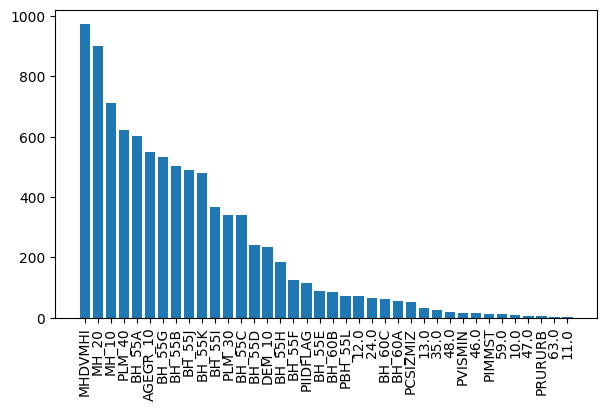

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
sorted_data = sorted(zip(feature_importance, Xi_train.columns), reverse=True)
y_sorted, x_sorted = zip(*sorted_data)
plt.bar(x_sorted, y_sorted)
#lgb.plot_importance(lgb_classifier,  title='Feature Importance', xlabel='Importance', ylabel='Features')

plt.xticks(rotation=90)

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37],
 [Text(0, 0, 'MHDVMHI'),
  Text(1, 0, 'MH_20'),
  Text(2, 0, 'MH_10'),
  Text(3, 0, 'PLM_40'),
  Text(4, 0, 'BH_55A'),
  Text(5, 0, 'AGEGR_10'),
  Text(6, 0, 'BH_55G'),
  Text(7, 0, 'BH_55B'),
  Text(8, 0, 'BH_55J'),
  Text(9, 0, 'BH_55K'),
  Text(10, 0, 'BH_55I'),
  Text(11, 0, 'PLM_30'),
  Text(12, 0, 'BH_55C'),
  Text(13, 0, 'BH_55D'),
  Text(14, 0, 'DEM_10'),
  Text(15, 0, 'BH_55H'),
  Text(16, 0, 'BH_55F'),
  Text(17, 0, 'PIIDFLAG'),
  Text(18, 0, 'BH_55E'),
  Text(19, 0, 'BH_60B'),
  Text(20, 0, 'PBH_55L'),
  Text(21, 0, '12.0'),
  Text(22, 0, '24.0'),
  Text(23, 0, 'BH_60C'),
  Text(24, 0, 'BH_60A'),
  Text(25, 0, 'PCSIZMIZ'),
  Text(26, 0, '13.0'),
  Text(27, 0, '35.0'),
  Text(28, 0, '48.0'),
  Text(29, 0, 'PVISMIN'),
  Text(30, 0, '46.0'),
  Text(31, 0, 'PIMMST

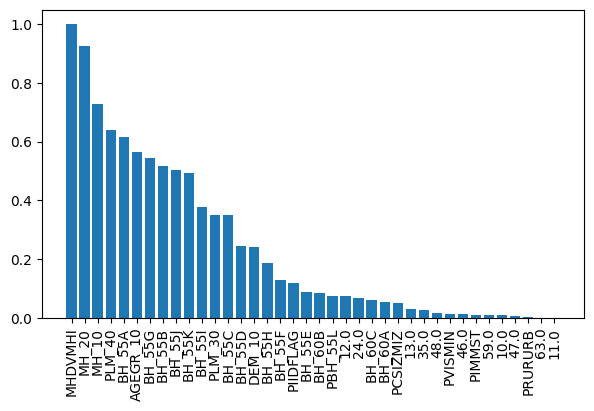

In [54]:
y_scaled = np.interp(feature_importance, (min(feature_importance), max(feature_importance)), (0, 1))
plt.figure(figsize=(7,4))
sorted_data = sorted(zip(y_scaled, Xi_train.columns), reverse=True)
y_sorted, x_sorted = zip(*sorted_data)
plt.bar(x_sorted, y_sorted)
plt.xticks(rotation=90)

[LightGBM] [Info] Number of positive: 20899, number of negative: 8533
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.046649 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 155
[LightGBM] [Info] Number of data points in the train set: 29432, number of used features: 38
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710077 -> initscore=0.895760
[LightGBM] [Info] Start training from score 0.895760
ROC AUC: 0.9045136127091247
Accuracy: 0.8424657534246576
Precision: 0.8424657534246576
F1 Score: 0.8424657534246577
Time: 5.418924808502197 and 0.2477710247039795


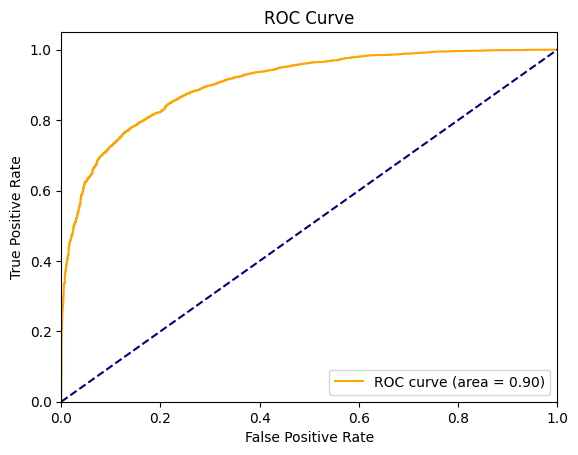

In [60]:
from sklearn.metrics import roc_curve, auc
import time
import matplotlib.pyplot as plt

t1=time.time()
lg = lgb.train(params, train_data)
t2=time.time()
y_test_pred_proba_lg_best = lg.predict(Xi_test, num_iteration=lg.best_iteration)
y_test_pred_lg_best = [round(pred) for pred in y_test_pred_proba_lg_best]
t3=time.time()


print("ROC AUC:", roc_auc_score(Yi_test, y_test_pred_proba_lg_best))
print("Accuracy:", accuracy_score(Yi_test, y_test_pred_lg_best))
print("Precision:", precision_score(Yi_test, y_test_pred_lg_best, average='micro'))
print("F1 Score:", f1_score(Yi_test, y_test_pred_lg_best, average='micro'))
print("Time:", t2-t1, 'and', t3-t2)

fpr, tpr, thresholds = roc_curve(Yi_test, y_test_pred_proba_lg_best)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

#Model for top 4 features

In [ ]:
sorted_data[:4]

[(1.0, 'MHDVMHI'),
 (0.9258496395468588, 'MH_20'),
 (0.729145211122554, 'MH_10'),
 (0.6395468589083418, 'PLM_40')]

##Dropping columns from Xi_train, Xi_test and Xi_val

In [61]:
#dropping all columns except the top 4 important features
print(Xi_test.columns)
Xi_train4=Xi_train.drop(columns=['BH_60A', 'BH_60B', 'BH_60C', 'BH_55A', 'BH_55B',
       'BH_55C', 'BH_55D', 'BH_55E', 'BH_55F', 'BH_55G', 'BH_55H', 'BH_55I',
       'BH_55J', 'BH_55K', 'DEM_10', 'AGEGR_10', 'PBH_55L',
       'PCSIZMIZ', 'PIIDFLAG', 'PIMMST', 'PLM_30', 'PRURURB',
       'PVISMIN', '10.0', '11.0', '12.0', '13.0', '24.0', '35.0', '46.0',
       '47.0', '48.0', '59.0', '63.0'])
Xi_test4=Xi_test.drop(columns=['BH_60A', 'BH_60B', 'BH_60C', 'BH_55A', 'BH_55B',
       'BH_55C', 'BH_55D', 'BH_55E', 'BH_55F', 'BH_55G', 'BH_55H', 'BH_55I',
       'BH_55J', 'BH_55K', 'DEM_10', 'AGEGR_10', 'PBH_55L',
       'PCSIZMIZ', 'PIIDFLAG', 'PIMMST', 'PLM_30', 'PRURURB',
       'PVISMIN', '10.0', '11.0', '12.0', '13.0', '24.0', '35.0', '46.0',
       '47.0', '48.0', '59.0', '63.0'])
Xi_val4=Xi_val.drop(columns=['BH_60A', 'BH_60B', 'BH_60C', 'BH_55A', 'BH_55B',
       'BH_55C', 'BH_55D', 'BH_55E', 'BH_55F', 'BH_55G', 'BH_55H', 'BH_55I',
       'BH_55J', 'BH_55K', 'DEM_10', 'AGEGR_10', 'PBH_55L',
       'PCSIZMIZ', 'PIIDFLAG', 'PIMMST', 'PLM_30', 'PRURURB',
       'PVISMIN', '10.0', '11.0', '12.0', '13.0', '24.0', '35.0', '46.0',
       '47.0', '48.0', '59.0', '63.0'])


Index(['MH_10', 'MH_20', 'BH_60A', 'BH_60B', 'BH_60C', 'BH_55A', 'BH_55B',
       'BH_55C', 'BH_55D', 'BH_55E', 'BH_55F', 'BH_55G', 'BH_55H', 'BH_55I',
       'BH_55J', 'BH_55K', 'DEM_10', 'MHDVMHI', 'AGEGR_10', 'PBH_55L',
       'PCSIZMIZ', 'PIIDFLAG', 'PIMMST', 'PLM_30', 'PLM_40', 'PRURURB',
       'PVISMIN', '10.0', '11.0', '12.0', '13.0', '24.0', '35.0', '46.0',
       '47.0', '48.0', '59.0', '63.0'],
      dtype='object')


In [ ]:
Xi_train4.columns

Index(['MH_10', 'MH_20', 'MHDVMHI', 'PLM_40'], dtype='object')

##Applying LGBoost

In [64]:
# Running the model once to see the ROC scure, Accuracy, Precision and F1 score
from tensorflow.python.ops.gen_math_ops import lgamma
import lightgbm as lgb

train_data4 = lgb.Dataset(Xi_train4, label=Yi_train)
val_data4 = lgb.Dataset(Xi_val4, label=Yi_val)
test_data4= lgb.Dataset(Xi_test4, label=Yi_test)

params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'seed': 42
}


lg = lgb.train(params, train_data4, valid_sets=[val_data4], num_boost_round=100) # Use early_stopping_rounds within lgb.train

y_val_pred_proba_lg4 = lg.predict(Xi_val4, num_iteration=lg.best_iteration)
y_val_pred_lg4 = [round(pred) for pred in y_val_pred_proba_lg4]


roc_auc_lg = roc_auc_score(Yi_val, y_val_pred_proba_lg4, multi_class='ovr')
accuracy_lg = accuracy_score(Yi_val, y_val_pred_lg4)


precision_lg = precision_score(Yi_val, y_val_pred_lg4, average='micro')


f1_lg = f1_score(Yi_val, y_val_pred_lg4, average='micro')

print("ROC AUC:", roc_auc_lg)
print("Accuracy:", accuracy_lg)
print("Precision:", precision_lg)
print("F1 Score:", f1_lg)

[LightGBM] [Info] Number of positive: 20899, number of negative: 8533
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000459 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 29432, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710077 -> initscore=0.895760
[LightGBM] [Info] Start training from score 0.895760
ROC AUC: 0.8887729475179267
Accuracy: 0.8274222041038185
Precision: 0.8274222041038185
F1 Score: 0.8274222041038185


##Hyperparameter Tuning

In [ ]:
from lightgbm import LGBMClassifier

param_space_lg = {
    'n_estimators': np.arange(100, 1000, 100),
    'learning_rate': np.logspace(-3, 0, 4),
    'max_depth': np.arange(3, 10),
    'subsample': np.arange(0.5, 1.0, 0.1),
    'colsample_bytree': np.arange(0.5, 1.0, 0.1),
    'reg_alpha': np.logspace(-3, 3, 7),
    'reg_lambda': np.logspace(-3, 3, 7),
    'min_child_samples': np.arange(1, 20)
}

lgb = LGBMClassifier()

random_search_lgb4 = RandomizedSearchCV(lgb, param_space_lg, n_iter=10, cv=5)
random_search_lgb4.fit(Xi_train4, Yi_train)

print("Best Hyperparameters: ", random_search_lgb4.best_params_)
print("Best Accuracy: ", random_search_lgb4.best_score_)

Best Hyperparameters:  {'subsample': 0.7, 'reg_lambda': 0.01, 'reg_alpha': 0.01, 'n_estimators': 700, 'min_child_samples': 11, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.5}
Best Accuracy:  0.8230841916231743


##Running code on the best hyperparameters

In [65]:
import lightgbm as lgb
import time
lgb_classifier = lgb.LGBMClassifier(
    subsample= 0.7,
    reg_lambda=0.01,
    reg_alpha=0.01,
    n_estimators=700,
    min_child_samples= 11,
    max_depth= 7,
    learning_rate=0.1,
    colsample_bytree= 0.5)

# Fit the classifier on your training data
t1=time.time()
lgb_classifier.fit(Xi_train4, Yi_train)
t2=time.time()

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Number of positive: 20899, number of negative: 8533
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002046 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23
[LightGBM] [Info] Number of data points in the train set: 29432, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.710077 -> initscore=0.895760
[LightGBM] [Info] Start training from score 0.895760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

ROC AUC: 0.8885769652013353
Accuracy: 0.8307240704500979
Precision: 0.8307240704500979
F1 Score: 0.8307240704500978
Time: 2.2900285720825195 and 0.05887126922607422


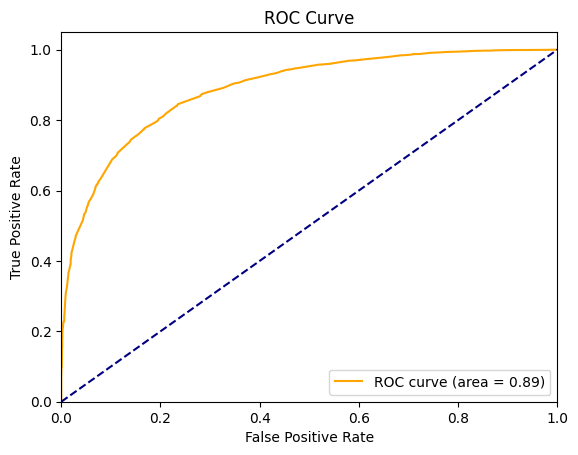

In [66]:
import lightgbm as lgb
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

t2_=time.time()
y_test_pred_proba_lg_best4 = lg.predict(Xi_test4, num_iteration=lg.best_iteration)
y_test_pred_lg_best4 = [round(pred) for pred in y_test_pred_proba_lg_best4]
t3_=time.time()


print("ROC AUC:", roc_auc_score(Yi_test, y_test_pred_proba_lg_best4))
print("Accuracy:", accuracy_score(Yi_test, y_test_pred_lg_best4))
print("Precision:", precision_score(Yi_test, y_test_pred_lg_best4, average='micro'))
print("F1 Score:", f1_score(Yi_test, y_test_pred_lg_best4, average='micro'))
print("Time:", t2-t1, 'and', t3_-t2_)

fpr, tpr, thresholds = roc_curve(Yi_test, y_test_pred_proba_lg_best4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()